<a href="https://colab.research.google.com/github/monicasjsu/deep_learning/blob/master/keras_LeNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **use KERAS and from scratch (not using existing architecture shipped models) write basic LeNet (mnist)**

In [0]:
# LeNet for MNIST using Keras and TensorFlow

from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn import datasets
import numpy as np
from keras.datasets import mnist
import matplotlib. pyplot as plt
from keras.preprocessing.image import ImageDataGenerator


Using TensorFlow backend.


Download the MNIST dataset from keras

In [0]:
# Download the MNIST dataset

(X_train, y_train), (X_test, y_test) = mnist.load_data()

Make sure images are loaded by plotting at least 1 digit.

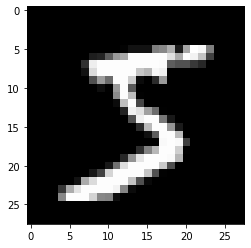

In [0]:
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.show()

In [0]:
X_train.shape

(60000, 28, 28)

In [0]:
X_test.shape

(10000, 28, 28)

In [0]:
# Reshape the data to a (70000, 28, 28) tensor
X_train = X_train.reshape(X_train.shape[0], 28, 28)
X_test = X_test.reshape(X_test.shape[0], 28, 28)


In [0]:
# # Reshape the data to a (70000, 28, 28, 1) tensord
X_train = X_train[:, :, :, np.newaxis]
X_test = X_test[:, :, :, np.newaxis]

Normalize the values in each pixel to have the value of each pixel in the range of 0 to 1.

In [0]:
# Scale values from range of [0-255] to [0-1]
X_train = X_train / 255.0
X_test = X_test / 255.0

In [0]:
# Tranform training labels to one-hot encoding
train_labels = np_utils.to_categorical(y_train, 10)

In [0]:
# Tranform test labels to one-hot encoding
test_labels = np_utils.to_categorical(y_test, 10)


In [0]:
# Create a sequential model
model = Sequential()

# Add the first convolution layer
model.add(Convolution2D(
    filters = 20,
    kernel_size = (5, 5),
    padding = "same",
    input_shape = (28, 28, 1)))

# Add a ReLU activation function
model.add(Activation(
    activation = "relu"))

# Add a pooling layer
model.add(MaxPooling2D(
    pool_size = (2, 2),
    strides =  (2, 2)))

# Add the second convolution layer
model.add(Convolution2D(
    filters = 50,
    kernel_size = (5, 5),
    padding = "same"))

# Add a ReLU activation function
model.add(Activation(
    activation = "relu"))

# Add a second pooling layer
model.add(MaxPooling2D(
    pool_size = (2, 2),
    strides = (2, 2)))

# Flatten the network
model.add(Flatten())

# Add a fully-connected hidden layer
model.add(Dense(500))

# Add a ReLU activation function
model.add(Activation(
    activation = "relu"))

# Add a fully-connected output layer
model.add(Dense(10))

# Add a softmax activation function
model.add(Activation("softmax"))

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 20)        520       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 20)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 50)        25050     
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 50)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 50)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2450)             

In [0]:
# Compile the network
model.compile(
    loss = "categorical_crossentropy",
    optimizer = SGD(lr = 0.01),
    metrics = ["accuracy"])

In [0]:
# image_gen = ImageDataGenerator(rotation_range=30, width_shift_range=0.1,
# 	height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
# 	horizontal_flip=True, fill_mode="nearest")

In [0]:
# Train the model 
# model.fit_generator(
#     train_generator,
#     steps_per_epoch=200,epochs=5,verbose=1)

model.fit(
    X_train, 
    train_labels, 
    batch_size = 128, 
    nb_epoch = 20,
	  verbose = 1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  import sys


Epoch 1/20
60000/60000 [==============================] - 9s 158us/step - loss: 0.9624 - accuracy: 0.7485
Epoch 2/20
60000/60000 [==============================] - 3s 43us/step - loss: 0.2518 - accuracy: 0.9248
Epoch 3/20
60000/60000 [==============================] - 3s 42us/step - loss: 0.1783 - accuracy: 0.9476
Epoch 4/20
60000/60000 [==============================] - 3s 42us/step - loss: 0.1397 - accuracy: 0.9579
Epoch 5/20
60000/60000 [==============================] - 3s 42us/step - loss: 0.1150 - accuracy: 0.9659
Epoch 6/20
60000/60000 [==============================] - 3s 43us/step - loss: 0.0989 - accuracy: 0.9705
Epoch 7/20
60000/60000 [==============================] - 3s 43us/step - loss: 0.0880 - accuracy: 0.9732
Epoch 8/20
60000/60000 [==============================] - 3s 43us/step - loss: 0.0782 - accuracy: 0.9763
Epoch 9/20
60000/60000 [==============================] - 3s 42us/step - loss: 0.0715 - accuracy: 0.9785
Epoch 10/20
60000/60000 [=============================

In [0]:
(loss, accuracy) = model.evaluate(X_test, test_labels)

10000/10000 [==============================] - 1s 81us/step


In [0]:
print(accuracy)

0.9839000105857849
